In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('population.csv')

In [3]:
data.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [4]:
data.rename(columns = {'District.Code':'District Code', 'District.Name':'District Name', 'Neighborhood.Code':'Neighborhood Code','Neighborhood.Name':'Neighborhood Name' }, inplace = True)

In [5]:
data

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124
...,...,...,...,...,...,...,...,...
70075,2013,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Female,>=95,21
70076,2013,10,Sant Martí,70,el Besòs i el Maresme,Female,>=95,25
70077,2013,10,Sant Martí,71,Provençals del Poblenou,Female,>=95,31
70078,2013,10,Sant Martí,72,Sant Martí de Provençals,Female,>=95,38


In [6]:
data.shape

(70080, 8)

In [7]:
list(data.columns)

['Year',
 'District Code',
 'District Name',
 'Neighborhood Code',
 'Neighborhood Name',
 'Gender',
 'Age',
 'Number']

In [8]:
data.isnull().sum().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 8 columns):
Year                 70080 non-null int64
District Code        70080 non-null int64
District Name        70080 non-null object
Neighborhood Code    70080 non-null int64
Neighborhood Name    70080 non-null object
Gender               70080 non-null object
Age                  70080 non-null object
Number               70080 non-null int64
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


In [10]:
data['Number'].sum()

8048318

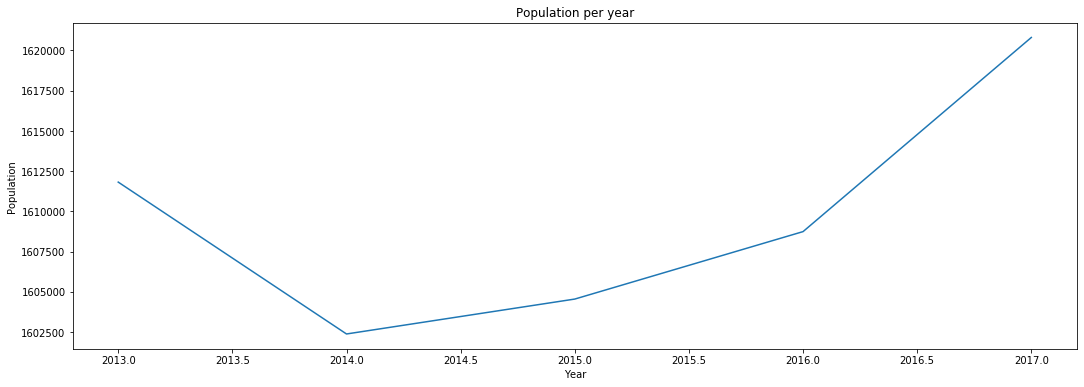

In [11]:
population_per_year = data.groupby('Year')['Number'].sum().reset_index()
ax = sns.lineplot(x="Year", y="Number", data=population_per_year)
ax.set_title('Population per year')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
fig=plt.gcf()
fig.set_size_inches(18,6)

To know well about a city, it is of pinnnacle of importance to have a look at the population. As the population increased () in Barcelona from 2014 onwards, it is safe to assume that has provided people with more opportunity, that is why more people moved there over time. There is also something happended back in 2013 that made a portion of the population leave this city.

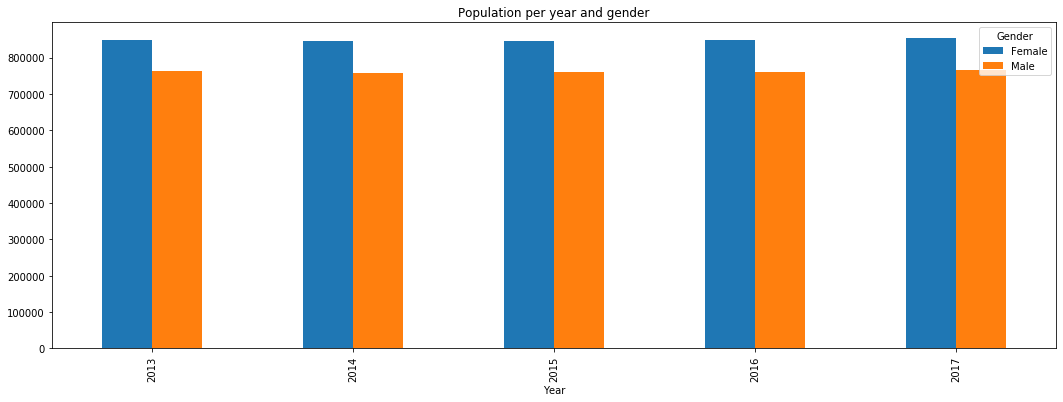

In [43]:
data.groupby(['Year', 'Gender'])['Number'].sum().unstack().plot.bar(title='Population per year and gender')
fig=plt.gcf()
fig.set_size_inches(18,6)

Looking at the gender ratio is also an interesting way to analyze some important parameters such whether there is a level playing field for everyone. In terms of Barcelona, it seems that nearly equal number of people from both gender have been living there over time.

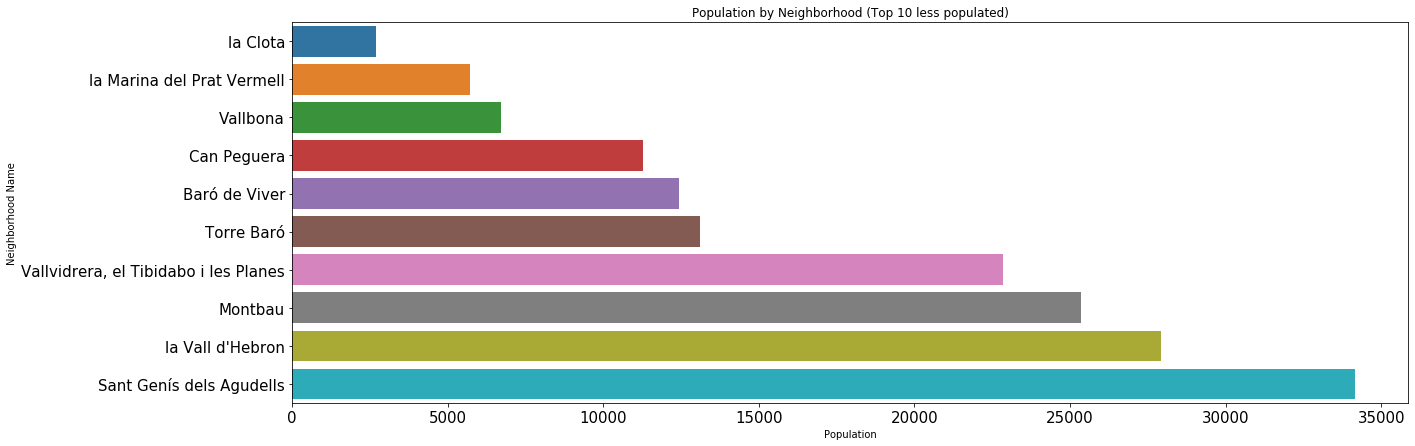

In [44]:
f,ax = plt.subplots(1,1, figsize=(20,7))

neighborhood_populations = data.groupby('Neighborhood Name')['Number'].sum().reset_index().sort_values('Number',ascending=True).iloc[0:10]
sns.barplot(x='Number', y='Neighborhood Name', data=neighborhood_populations, ax=ax)
ax.set_title('Population by Neighborhood (Top 10 less populated)')
ax.set_xlabel('Population')
ax.tick_params(labelsize=15)
plt.show()

Finding out the crowded places is another useful thing to know about a city. In general, more crowded places are commercial an recreational centers. Many people try to avoid crowded neighborhood when it comes to living.